# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is a practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images are from Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However, only 2 classes (pizza & steak) are used by image data modification

> **Note:** A smaller is used to experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [3]:
# import zipfile

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of the data.

In [4]:
import os

# Walk through the`` pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak\test' .
There are 0 directories and 250 images in 'pizza_steak\test\pizza' .
There are 0 directories and 250 images in 'pizza_steak\test\steak' .
There are 2 directories and 0 images in 'pizza_steak\train' .
There are 0 directories and 750 images in 'pizza_steak\train\pizza' .
There are 0 directories and 750 images in 'pizza_steak\train\steak' .


In [5]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize the images, first let's get the class name programmatically

In [6]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names from the subdirectories
print(class_names)


['pizza' 'steak']


In [7]:
# Let's visualize the images
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Set the target directory (view images from this directory)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read the image
    img = mpimg.imread(target_folder + "/" + random_image[0])

    # Plot the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"An image of a {target_class}")
    plt.show()

    print(f"Image shape: {img.shape}") # Show the shape of the image

    return img

['176508.jpg']


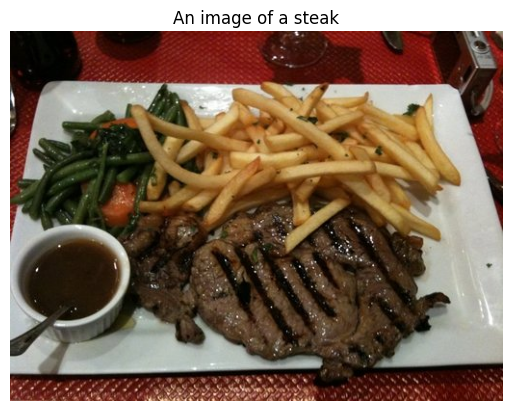

Image shape: (384, 512, 3)


In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  9,   5,   2],
        [  6,   2,   0],
        [  5,   1,   0],
        ...,
        [157, 156, 128],
        [146, 144, 119],
        [153, 151, 128]],

       [[  9,   5,   2],
        [  8,   4,   1],
        [  8,   4,   1],
        ...,
        [149, 143, 117],
        [141, 135, 111],
        [150, 144, 122]],

       [[  8,   4,   1],
        [ 10,   6,   3],
        [ 10,   6,   3],
        ...,
        [142, 130, 106],
        [144, 129, 108],
        [151, 136, 117]],

       ...,

       [[112,  42,  32],
        [ 94,  26,  15],
        [108,  40,  31],
        ...,
        [126,  59,  43],
        [130,  63,  47],
        [105,  38,  22]],

       [[134,  66,  57],
        [116,  48,  39],
        [120,  56,  47],
        ...,
        [ 94,  29,  11],
        [ 98,  33,  15],
        [ 92,  27,   9]],

       [[154,  86,  77],
        [155,  88,  79],
        [142,  78,  69],
        ...,
        [ 89,  24,   

In [10]:
# View the image shape
img.shape # returns the width, height, color channels

(384, 512, 3)

> **Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. One of the most preprocessing steps for working with images is to scale (also referred to as normalize) thier values by dividing the image arrays by 255.(since 255 is the maximum pixel value).

In [11]:
# Get all the pixel values between 0 and 1 
img/255.

array([[[0.03529412, 0.01960784, 0.00784314],
        [0.02352941, 0.00784314, 0.        ],
        [0.01960784, 0.00392157, 0.        ],
        ...,
        [0.61568627, 0.61176471, 0.50196078],
        [0.57254902, 0.56470588, 0.46666667],
        [0.6       , 0.59215686, 0.50196078]],

       [[0.03529412, 0.01960784, 0.00784314],
        [0.03137255, 0.01568627, 0.00392157],
        [0.03137255, 0.01568627, 0.00392157],
        ...,
        [0.58431373, 0.56078431, 0.45882353],
        [0.55294118, 0.52941176, 0.43529412],
        [0.58823529, 0.56470588, 0.47843137]],

       [[0.03137255, 0.01568627, 0.00392157],
        [0.03921569, 0.02352941, 0.01176471],
        [0.03921569, 0.02352941, 0.01176471],
        ...,
        [0.55686275, 0.50980392, 0.41568627],
        [0.56470588, 0.50588235, 0.42352941],
        [0.59215686, 0.53333333, 0.45882353]],

       ...,

       [[0.43921569, 0.16470588, 0.1254902 ],
        [0.36862745, 0.10196078, 0.05882353],
        [0.42352941, 0

## An end-to-end example

Build a convolutional neural network to find patterns in our images, more specifically a way to:

* Load the images
* Preprocess the images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = r"C:\Users\agarw\OneDrive\Desktop\Rohan\Tensorflow\Computer Vision and CNN\pizza_steak\train"
test_dir = r"C:\Users\agarw\OneDrive\Desktop\Rohan\Tensorflow\Computer Vision and CNN\pizza_steak\test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 39s 807ms/step - loss: 0.6177 - accuracy: 0.6667 - val_loss: 0.5305 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 25s 521ms/step - loss: 0.4787 - accuracy: 0.7880 - val_loss: 0.4287 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 25s 521ms/step - loss: 0.4210 - accuracy: 0.8107 - val_loss: 0.3323 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 24s 506ms/step - loss: 0.3915 - accuracy: 0.8407 - val_loss: 0.3642 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 28s 588ms/step - loss: 0.3568 - accuracy: 0.8607 - val_loss: 0.3408 - val_accuracy: 0.8580


> **Note:** If the above cell is taking longer than 10 seconds per epoch, make sure to use a GPU

In [13]:
len(train_data)

47

In [14]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [15]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.13.0
GPU Available: []


In [16]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU setup completed.")
    except RuntimeError as e:
        print("Error during GPU setup:", e)
else:
    print("No GPU detected.")


No GPU detected.


In [17]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [18]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


## Using the same model as before

Replicate the model built in a previous section to see if it works with the image data

The model is from [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.94571&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 113ms/step - loss: 0.7189 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [20]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than the CNN (model_1), model_2 performs terribly

In [21]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 3.6568 - accuracy: 0.6213 - val_loss: 1.5448 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.7913 - accuracy: 0.7293 - val_loss: 0.6138 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.8474 - accuracy: 0.7460 - val_loss: 1.0643 - val_accuracy: 0.6540
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.8826 - accuracy: 0.7140 - val_loss: 0.4725 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4405 - accuracy: 0.8113 - val_loss: 0.4602 - val_accuracy: 0.7800


In [22]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> Trainable parameters are **patterns a model can learn from data**. We can think more is better. And in lot of cases, it is. But in this case, the difference here is the two different styles of model used. Where a series of dense layers has a number of different learnable patterns connected to each other and hence a higher number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are less learnable parameters in our convolutional neural network, these often more helpful in deciphering different **features** in an image.

## Binary Classification

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared for our model, the main step here was scaling/normalizing & turning the data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3047807.jpg']


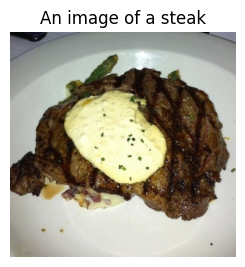

Image shape: (512, 512, 3)
['2723529.jpg']


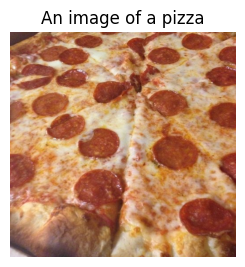

Image shape: (512, 512, 3)


In [23]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [24]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Next step is to turn the data into **batches**.

A batch is a small subset of data. Rather than look at all ~ 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of the processor (GPU).
2. Trying to learn the patterns in 10,000 in one hit could result in the model not being able to learn very well. 

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data working with
                                               batch_size=32) # Size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there
len(train_data)

47

In [29]:
# Get the first 2 images
images[:2], images[:2].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to be beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures to create. So one of the best ways to get started is to start with something simple and see if it works on the data and then introduce complexity as required (e.g. look at which current model is performing best in the field for the problem).

In [31]:
# Make the creating of our model a little easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model (this will be the baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going inside an input (higher equals more complex)
           kernel_size=(3,3), # the size of the sliding window going across an input
           strides=(1,1), # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [33]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [35]:
# Check the lengths of the training and test data genertors
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 43s 893ms/step - loss: 0.7311 - accuracy: 0.6887 - val_loss: 0.4457 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 29s 620ms/step - loss: 0.4262 - accuracy: 0.8173 - val_loss: 0.4030 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 29s 611ms/step - loss: 0.2649 - accuracy: 0.9020 - val_loss: 0.4080 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 29s 612ms/step - loss: 0.1296 - accuracy: 0.9620 - val_loss: 0.6744 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 40s 864ms/step - loss: 0.0721 - accuracy: 0.9820 - val_loss: 0.4818 - val_accuracy: 0.8100


In [37]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 180ms/step - loss: 0.3408 - accuracy: 0.8580


[0.34082427620887756, 0.8579999804496765]

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### 5. Evaluate the model

It looks like the model is learning something, let's evaluate it.

<Axes: >

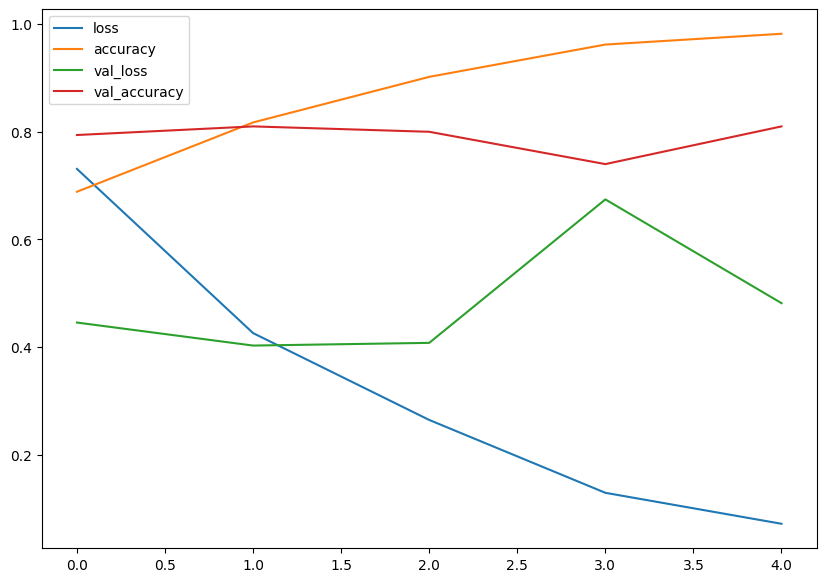

In [39]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [40]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # how many epochs did we run for?

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="validation_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

> **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

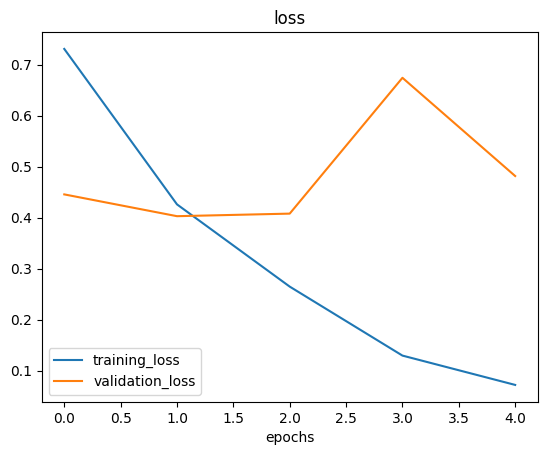

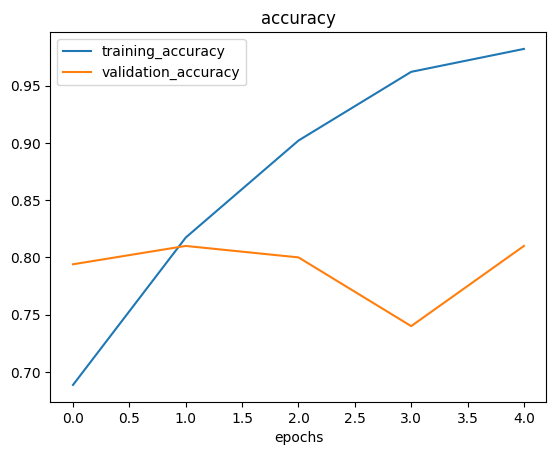

In [41]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of the flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data ....

> **Note:** Reducing overfitting is also known as **regularization**.

In [42]:
# Create the model (this is going to be the new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
           MaxPool2D(pool_size=2),
           Conv2D(10, 3, activation="relu"),
           MaxPool2D(),
           Conv2D(10, 3, activation="relu"),
           MaxPool2D(),
           Flatten(),
           Dense(1, activation="sigmoid")
])

In [43]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [44]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 280ms/step - loss: 0.6964 - accuracy: 0.5387 - val_loss: 0.6644 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 12s 257ms/step - loss: 0.5638 - accuracy: 0.7267 - val_loss: 0.6234 - val_accuracy: 0.6280
Epoch 3/5
47/47 [==============================] - 12s 246ms/step - loss: 0.5192 - accuracy: 0.7500 - val_loss: 0.4357 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4610 - accuracy: 0.7853 - val_loss: 0.4097 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4384 - accuracy: 0.7980 - val_loss: 0.3735 - val_accuracy: 0.8540


In [45]:
# Get a summary of the model with Max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

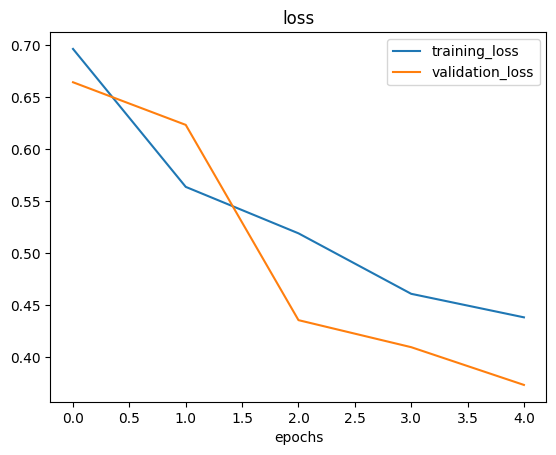

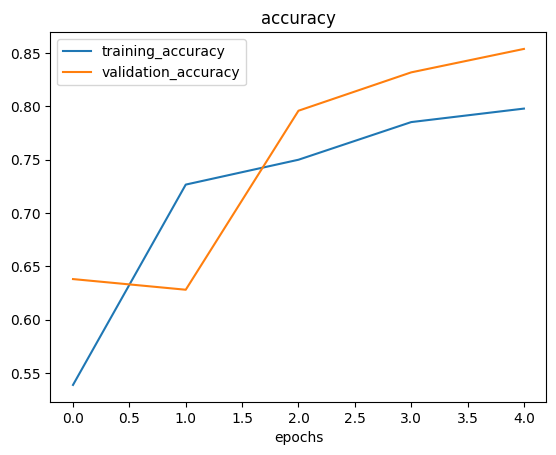

In [46]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening the bag of tricks and finding data augmentation

In [47]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much you want to rotate an image 
                                             shear_range=0.2, # how much you want to sheer on an image
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augmentation?

Data augmentation is the process of altering the training data, leading it to have more diversity and in turn allowing the model to learn more generalizable patterns. ALtering might mean adjusting rotation of an image, flipping it, cropping it or something similar.

Visualize data augmentation...

In [48]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False) # for demonstration only

# Create non-augmented train data batches
print("Non-Augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the  directories but are modified as they are loaded into the model.

In [49]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented, only images are

Showing image number : 15


(-0.5, 223.5, 223.5, -0.5)

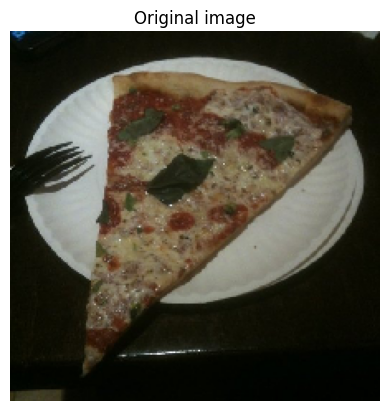

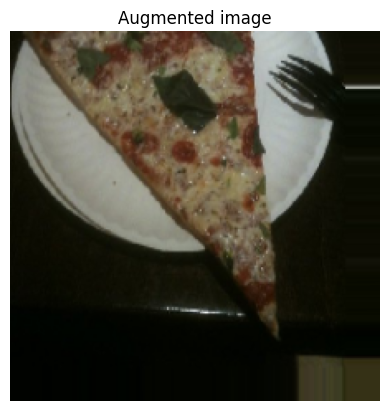

In [50]:
# Show the original and augmented image
import random
random_number = random.randint(0, 32) # the batch sizes are 32...
print(f"Showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

We've built what augmeneted training data looks like, built a model and see how it learns on augmented data.

In [51]:
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 453ms/step - loss: 0.7251 - accuracy: 0.4093 - val_loss: 0.6851 - val_accuracy: 0.5260
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6926 - accuracy: 0.5273 - val_loss: 0.6745 - val_accuracy: 0.6420
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6891 - accuracy: 0.5407 - val_loss: 0.6350 - val_accuracy: 0.5920
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.6650 - accuracy: 0.6013 - val_loss: 0.6474 - val_accuracy: 0.5580
Epoch 5/5
47/47 [==============================] - 27s 565ms/step - loss: 0.6218 - accuracy: 0.6447 - val_loss: 0.5663 - val_accuracy: 0.7540


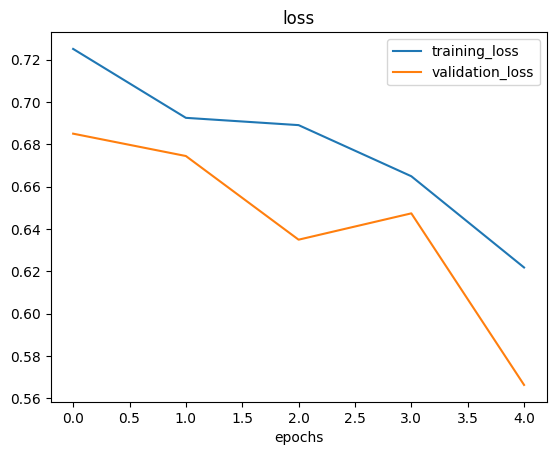

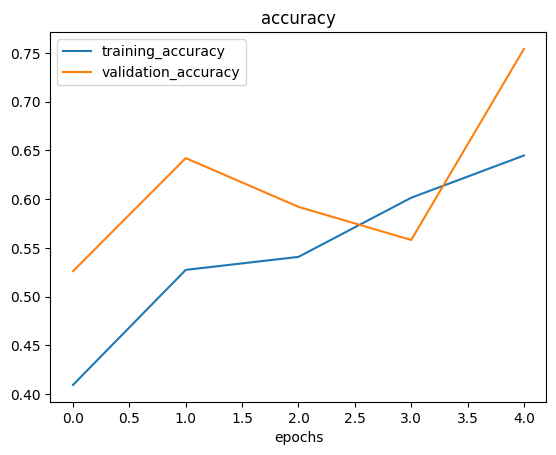

In [52]:
# Check the model
plot_loss_curves(history_6)

Shuffle the augmeneted training data and train another model (the same as before) on it and see what happens.

In [53]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [54]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # fit the model on augmented shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 38s 782ms/step - loss: 0.6424 - accuracy: 0.6320 - val_loss: 0.5245 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 35s 750ms/step - loss: 0.5517 - accuracy: 0.7273 - val_loss: 0.4489 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 25s 525ms/step - loss: 0.5447 - accuracy: 0.7320 - val_loss: 0.3755 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 23s 476ms/step - loss: 0.5191 - accuracy: 0.7420 - val_loss: 0.4326 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 22s 457ms/step - loss: 0.5046 - accuracy: 0.7520 - val_loss: 0.3581 - val_accuracy: 0.8300


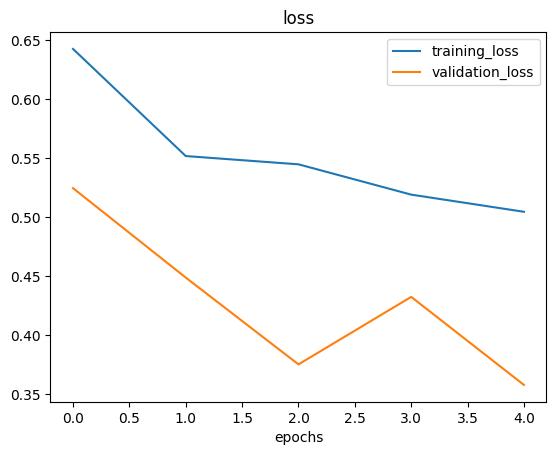

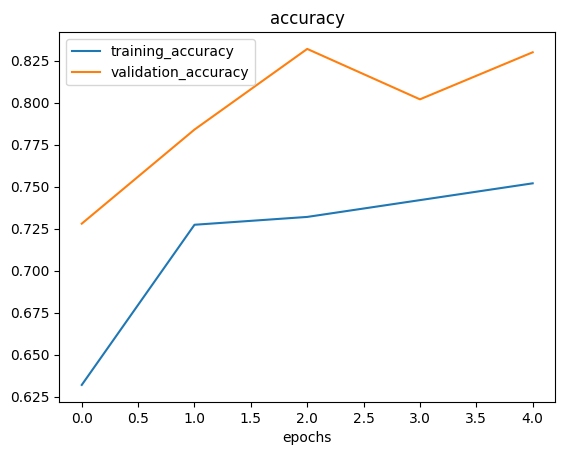

In [55]:
# Plot loss curves
plot_loss_curves(history_7)

### 7. Repeat until satisfied

The model has already beaten baseline, there are a few can be done to improve it

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train longer (more epochs)
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what other image model has learned and adjust it for our own use case.

## Making a prediction with our trained model on our own custom data

In [56]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


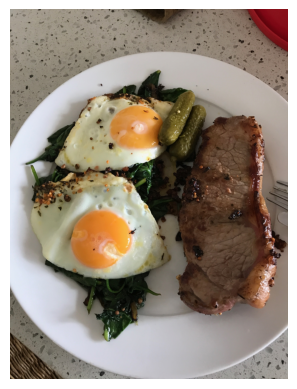

In [57]:
import urllib.request
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt

# URL of the image
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"

# Open the URL and read the image
with urllib.request.urlopen(url) as response:
    image_data = response.read()
    image = Image.open(io.BytesIO(image_data))  # Convert to an image using Pillow

# Convert to a NumPy array (if needed for further processing)
steak = np.array(image)

# Display the image
plt.imshow(steak)
plt.axis("off")
plt.show()

In [58]:
# Check the shape of the image
steak.shape

(4032, 3024, 3)

In [59]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

> **Note:** When you train a neural network and want to make a prediction with it on custom data, it's important that the custom data is preprocessed as the same format as the data your model was trained on.

In [60]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [61]:
# Create a function to import an image and resize it be able to be used with the model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes
    it to (img_shape, img_shape, colo_channels).
    """
    # Read in the image
    img = tf.convert_to_tensor(filename, dtype=tf.float32)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [62]:
# Load in and preprocess the image
steak = load_and_prep_image(steak)
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6406863 , 0.625     , 0.58186275],
        [0.65931374, 0.62990195, 0.59166664],
        [0.6357843 , 0.60833335, 0.56911767],
        ...,
        [0.5230392 , 0.05245098, 0.09166667],
        [0.5004902 , 0.04166667, 0.07696079],
        [0.53186274, 0.07696079, 0.1122549 ]],

       [[0.6632353 , 0.64754903, 0.6122549 ],
        [0.6387255 , 0.6230392 , 0.57990193],
        [0.6607843 , 0.62941176, 0.5862745 ],
        ...,
        [0.5352941 , 0.06764706, 0.09411765],
        [0.53186274, 0.06127451, 0.1004902 ],
        [0.5254902 , 0.05490196, 0.09411765]],

       [[0.65392154, 0.6382353 , 0.59117645],
        [0.64362746, 0.6122549 , 0.56911767],
        [0.65931374, 0.6279412 , 0.58480394],
        ...,
        [0.53382355, 0.06715687, 0.08480392],
        [0.53382355, 0.06617647, 0.10343137],
        [0.525     , 0.05441177, 0.09362745]],

       ...,

       [[0.49656862, 0.4254902 , 0.31813726],
        [0.05

In [63]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 122ms/step


array([[0.7514438]], dtype=float32)

In [64]:
# Index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [65]:
def pred_and_plot(model, input_data, class_names=class_names):
    """
    Imports an image or uses a preloaded image, makes a prediction with the model,
    and plots the image with the predicted class as the title.
    """
    # Check if input is a file path (string) or an image array
    if isinstance(input_data, str):  
        img = load_and_prep_image(input_data)  # Load and preprocess the image
    else:
        img = tf.image.resize(input_data, size=(224, 224)) / 255.0  # Preprocess the loaded image

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]  # Assuming binary classification
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()


1/1 [==============================] - 0s 27ms/step


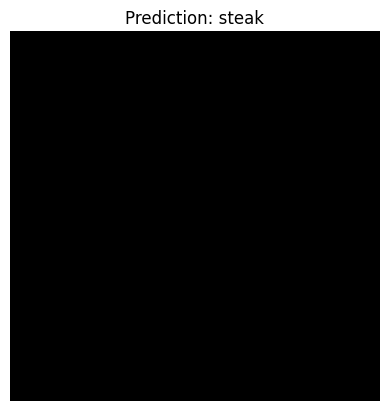

In [66]:
# Test the model on custom image
pred_and_plot(model_7, steak)

# Multi-class Image Classification

1. Become one with data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with data

In [67]:
# import urllib.request
# import zipfile

# # URL of the ZIP file
# url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
# zip_file_path = "10_food_classes_all_data.zip"

# # Download the ZIP file
# print("Downloading data...")
# urllib.request.urlretrieve(url, zip_file_path)
# print("Download complete.")

# # Unzip the data
# print("Extracting data...")
# with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
#     zip_ref.extractall()
# print("Extraction complete.")

In [68]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [69]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [71]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2090504.jpg']


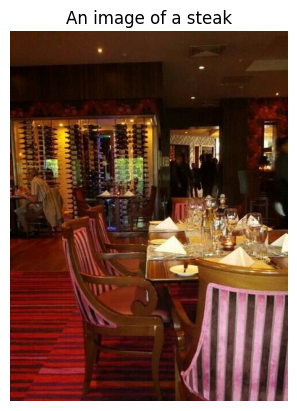

Image shape: (512, 384, 3)


In [70]:
# Visualize, visualize, visualize
import random 
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model(start with a baseline)

In [77]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.models.Sequential([
    Conv2D(filters=10, kernel_size=3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(pool_size=2, padding="valid"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])   

### 4. Fit the model

In [78]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 136s 576ms/step - loss: 2.2130 - accuracy: 0.1847 - val_loss: 2.0779 - val_accuracy: 0.2696
Epoch 2/5
235/235 [==============================] - 119s 507ms/step - loss: 1.9431 - accuracy: 0.3289 - val_loss: 1.9806 - val_accuracy: 0.2968
Epoch 3/5
235/235 [==============================] - 115s 487ms/step - loss: 1.5350 - accuracy: 0.4780 - val_loss: 2.1670 - val_accuracy: 0.2608
Epoch 4/5
235/235 [==============================] - 123s 525ms/step - loss: 0.9695 - accuracy: 0.6787 - val_loss: 2.7010 - val_accuracy: 0.2596
Epoch 5/5
235/235 [==============================] - 118s 500ms/step - loss: 0.4673 - accuracy: 0.8532 - val_loss: 3.6895 - val_accuracy: 0.2448


### 5. Evaluate the model

In [79]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 10s 121ms/step - loss: 3.6895 - accuracy: 0.2448


[3.6895089149475098, 0.24480000138282776]

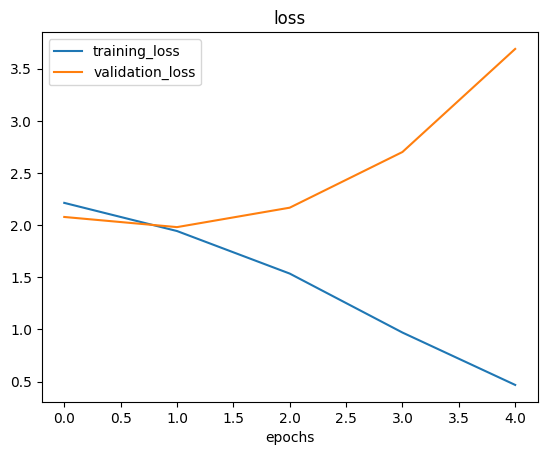

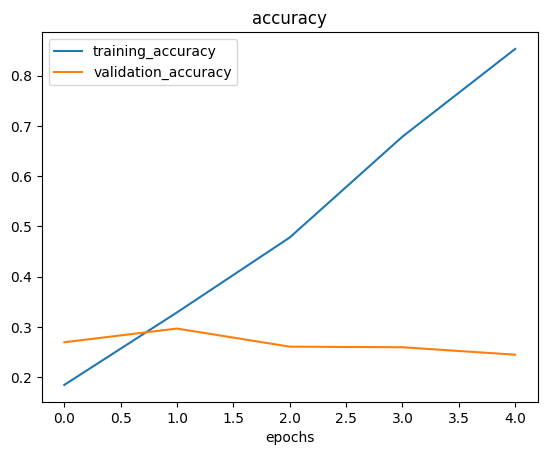

In [80]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell?

It seems that the model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something.

However, it's not generalizing well to unseen data (overfitting).

Fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns.
* **Simplify the model** - if the model is too complex, it may be fitting the noise in the data rather than the underlying patterns. To simplify the model is to reduce # of hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (wihout altering the original data).
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to our own and allows to use those patterns on our dataset.

In [83]:
# Try and simplify the model first
# Remove 2 convolutional layers

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [85]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 222ms/step - loss: 2.0963 - accuracy: 0.2497 - val_loss: 1.9462 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 53s 226ms/step - loss: 1.6931 - accuracy: 0.4224 - val_loss: 1.9482 - val_accuracy: 0.3068
Epoch 3/5
235/235 [==============================] - 56s 238ms/step - loss: 1.2415 - accuracy: 0.5948 - val_loss: 2.1062 - val_accuracy: 0.3040
Epoch 4/5
235/235 [==============================] - 54s 228ms/step - loss: 0.7760 - accuracy: 0.7616 - val_loss: 2.4259 - val_accuracy: 0.2976
Epoch 5/5
235/235 [==============================] - 64s 272ms/step - loss: 0.4101 - accuracy: 0.8865 - val_loss: 2.9270 - val_accuracy: 0.2784


In [84]:
model_9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [81]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

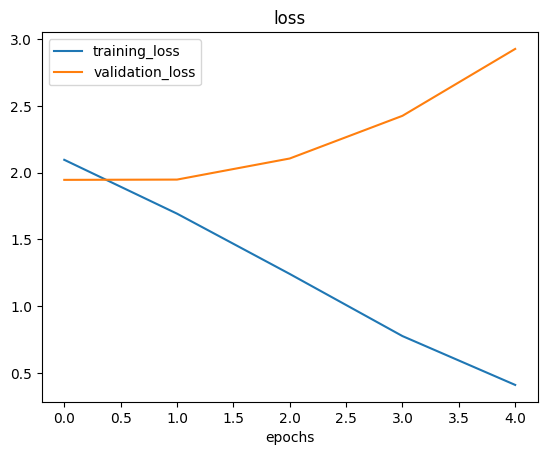

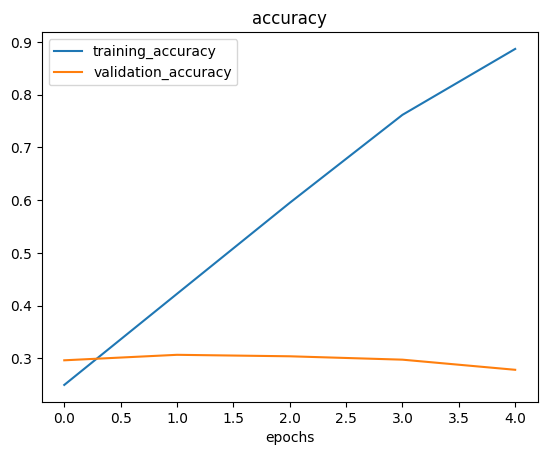

In [86]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

### Trying to reduce overfitting with data augmentation

In [89]:
# Create and augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [90]:
# Create another model but this time fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [91]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [92]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [94]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 139s 587ms/step - loss: 2.2135 - accuracy: 0.1839 - val_loss: 2.0664 - val_accuracy: 0.2636
Epoch 2/5
235/235 [==============================] - 143s 609ms/step - loss: 2.0673 - accuracy: 0.2676 - val_loss: 1.9373 - val_accuracy: 0.3108
Epoch 3/5
235/235 [==============================] - 134s 570ms/step - loss: 2.0126 - accuracy: 0.2956 - val_loss: 1.8853 - val_accuracy: 0.3472
Epoch 4/5
235/235 [==============================] - 139s 591ms/step - loss: 1.9698 - accuracy: 0.3121 - val_loss: 1.7964 - val_accuracy: 0.3916
Epoch 5/5
235/235 [==============================] - 138s 587ms/step - loss: 1.9267 - accuracy: 0.3289 - val_loss: 1.8255 - val_accuracy: 0.3560


In [95]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 3.6895 - accuracy: 0.2448


[3.6895077228546143, 0.24480000138282776]

In [96]:
model_10.evaluate(test_data)

79/79 [==============================] - 14s 173ms/step - loss: 1.8255 - accuracy: 0.3560


[1.825519323348999, 0.35600000619888306]

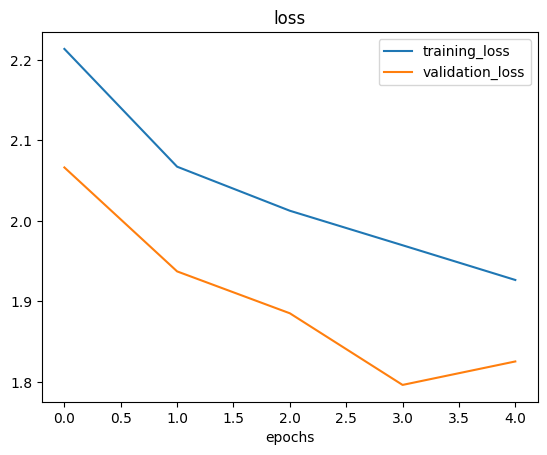

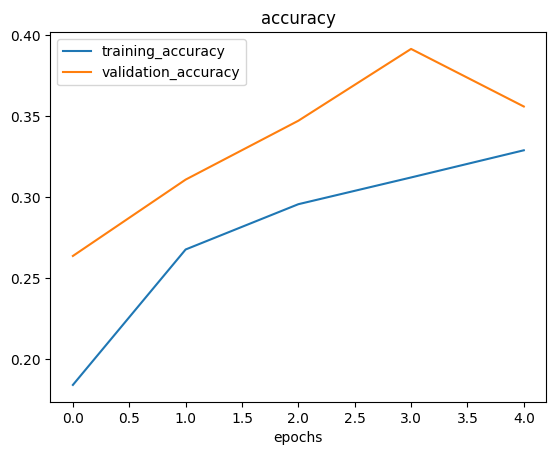

In [97]:
# Check out the model trained on augmented data's loss curves
plot_loss_curves(history_10)

### 7. Repeat until satisfied

The loss curves can be brought closer and try to improve the test/validation accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architectures (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs).
- try **transer learning**

### Make a prediction with the trained model

In [98]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [123]:
url_1 = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg"
url_2 = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"
url_3 = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg"
url_4 = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza.jpeg"

In [121]:
import requests
from PIL import Image
from io import BytesIO

def load_and_prep_image(image_path, img_shape=224):
    """
    Reads an image from a path (local or URL), reshapes, and scales it.
    """
    if image_path.startswith('http'):
        response = requests.get(image_path)
        # Ensure valid response
        if response.status_code == 200:
            try:
                img = Image.open(BytesIO(response.content)).convert("RGB")
            except UnidentifiedImageError:
                print("Error: Unable to identify image content from the URL.")
                return None
        else:
            print(f"Error: Unable to fetch image, HTTP status code {response.status_code}")
            return None
    else:
        img = Image.open(image_path).convert("RGB")
    
    # Resize and normalize the image
    img = img.resize((img_shape, img_shape))
    img = np.array(img) / 255.0
    return img

In [113]:
def pred_and_plot(model, input_data, class_names=class_names):
    """
    Loads an image, makes a prediction, and plots it.
    """
    img = load_and_prep_image(input_data)
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Handle multi-class classification
    if len(pred[0]) > 1:
        pred_class = class_names[np.argmax(pred)]
    else:  # Handle binary classification
        pred_class = class_names[int(tf.round(pred[0][0]))]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()


1/1 [==============================] - 0s 41ms/step


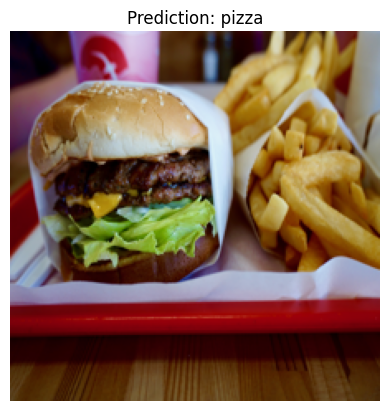

1/1 [==============================] - 0s 39ms/step


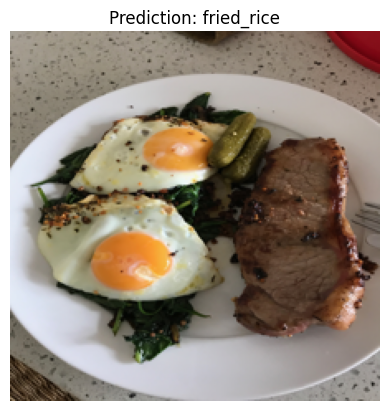

1/1 [==============================] - 0s 39ms/step


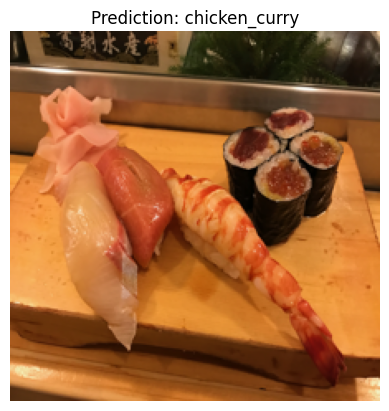

Error: Unable to fetch image, HTTP status code 404


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [124]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              input_data=url_1)
pred_and_plot(model=model_10,
              input_data=url_2)
pred_and_plot(model=model_10,
              input_data=url_3)
pred_and_plot(model=model_10,
              input_data=url_4)

## Saving and loading the model

In [118]:
# Save a model
model_10.save("saved_trained_model_10.h5")

C:\Users\agarw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [119]:
# Load in a trained model and evaluate it 
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10.h5")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 1.8255 - accuracy: 0.3560


[1.82551908493042, 0.35600000619888306]

In [120]:
# Compare the loaded model to the existing model
model_10.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 1.8255 - accuracy: 0.3560


[1.8255195617675781, 0.35600000619888306]